In [1]:
# instructor version
%pylab inline

Populating the interactive namespace from numpy and matplotlib


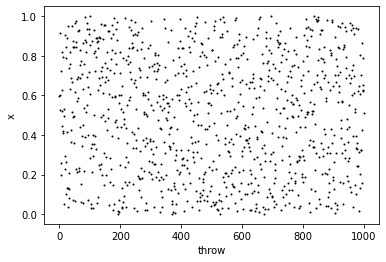

In [2]:
N     = 1000
SEED  = 2021**2
x = np.random.uniform(size=N)
plt.plot(np.arange(0,N),x,"k.",ms=2)
plt.xlabel("throw")
plt.ylabel("x")
plt.savefig("flat2d.pdf")

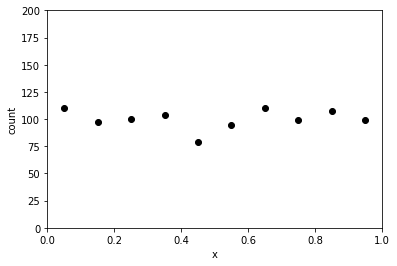

In [3]:
NBINS=10
hx,bins = np.histogram(x,bins=NBINS, range=(0,1))
cbins = (bins[1:] + bins[:-1])/2.0
plt.ylim(0,N/5)
plt.xlim(0,1)
plt.plot(cbins, hx, "ko")
plt.xlabel("x")
plt.ylabel("count")
plt.savefig("flathist.pdf")
np.random.seed(SEED)

[100. 100.]


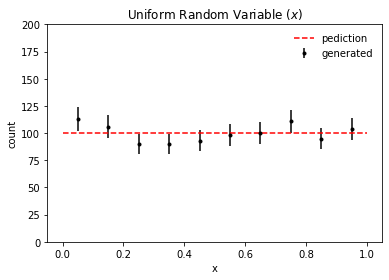

In [4]:
N     = 1000 # events to generate
NBINS = 10   # number of histogram bins
# generate the random variable x flat in [0,1]
x = np.random.uniform(size=N)
# fill the histogram
hx,bins = np.histogram(x,bins=NBINS, range=(0,1))
# calculate the center of each bin:
cbins = (bins[1:] + bins[:-1])/2.0
# calculate the Poisson uncertainty for each bin:
hunc = np.sqrt(hx)
# plot the histogram including error bars:
plt.ylim(0,N/5)
plt.errorbar(cbins, hx, yerr=hunc, fmt="k.", label="generated")
# calculate and plot the prediction:
xp = np.linspace(0,1,2)
yp = np.full(2, N / NBINS)
print(yp)
plt.plot(xp,yp,"r--", label="pediction")
# add legend, labels, and title
plt.legend(loc=1, frameon=False)
plt.xlabel("x")
plt.ylabel("count")
plt.title("Uniform Random Variable ($x$)")
plt.savefig("fancyhist.pdf")

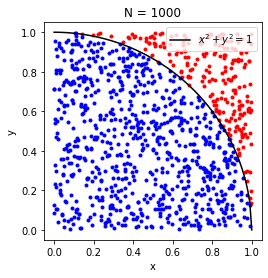

In [5]:
N = 1000 # number of throws:
# throw x and y variables uniform in [0,1]
x   = np.random.uniform(size=N)
y   = np.random.uniform(size=N)
# calculate the radius squared and masks
#  for the points inside and outside the circule
rsq = x**2 + y**2
inside  = (rsq<=1)
outside = np.logical_not(inside)
# set aspect ratio so that a circle looks like a circle:
plt.axes().set_aspect('equal')
# plot outside points as red, inside as blue
plt.plot(x[outside],y[outside],"r.")
plt.plot(x[inside],y[inside],"b.")
# draw a curve for the circle:
xfin   = np.linspace(0,1,100)
yfin   = sqrt(1 - xfin * xfin)
plt.plot(xfin, yfin, "k-",label="$x^2+y^2=1$")
# add labels, title, and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("N = "+str(N))
plt.legend(loc=1)
plt.savefig("pimc.pdf")

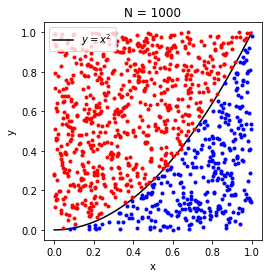

In [13]:
N = 1000
xfin   = np.linspace(0,1,101)
yfin   = xfin * xfin
x      = np.random.uniform(size=N)
y      = np.random.uniform(size=N)
below  = (y < x**2)
above = np.logical_not(below)
plt.axes().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xfin, yfin, "k-", label="$y = x^2$")
plt.plot(x[above],y[above],"r.")
plt.plot(x[below],y[below],"b.")
plt.title("N = "+str(N))
plt.legend(loc=2)
plt.savefig("rejectmc.pdf")
# keep only the selected x values:
x = x[below]

In [ ]:
### BEGIN PRIVATE SOLUTIONS ###

In [6]:
mypi = 4*np.sum(inside)/N
print(mypi)
print(mypi - np.pi)
print(np.sqrt(np.pi*(4-pi)/N))

3.144
0.002407346410207012
0.05193039777692651


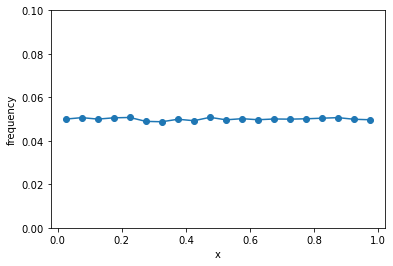

In [7]:
N     = 100000
NBINS = 20
x = np.random.uniform(size=N)
hx,bins = np.histogram(x,bins=NBINS, range=(0,1))
cbins = (bins[1:] + bins[:-1])/2.0
fx = hx / N
plt.ylim(0,0.1)
plt.xlabel("x")
plt.ylabel("frequency")
plt.plot(cbins, fx, "-o")
plt.savefig("rndflat.pdf")

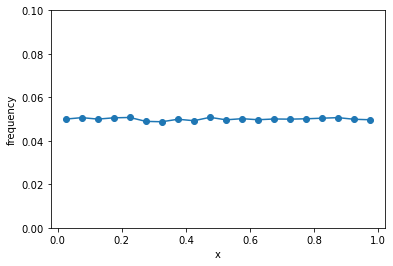

In [8]:
NBINS = 20
hx,bins = np.histogram(x,bins=NBINS, range=(0,1))
cbins = (bins[1:] + bins[:-1])/2.0
fx = hx / N
plt.ylim(0,0.1)
plt.xlabel("x")
plt.ylabel("frequency")
plt.plot(cbins, fx, "-o")
plt.savefig("rndflat.pdf")

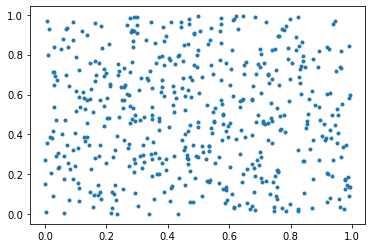

In [9]:
plt.plot(x[:500],x[1:501],".")
plt.savefig("rndcor.pdf")

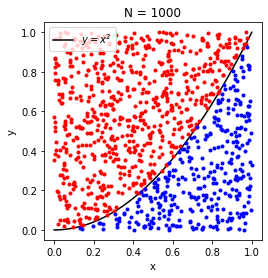

In [10]:
N = 1000
xfin   = np.linspace(0,1,101)
yfin   = xfin * xfin
x      = np.random.uniform(size=N)
y      = np.random.uniform(size=N)
below  = (y < x**2)
above = np.logical_not(below)
plt.axes().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xfin, yfin, "k-", label="$y = x^2$")
plt.plot(x[above],y[above],"r.")
plt.plot(x[below],y[below],"b.")
plt.title("N = "+str(N))
plt.legend(loc=2)
plt.savefig("rejectmc.pdf")
# keep only the selected x values:
x = x[below]

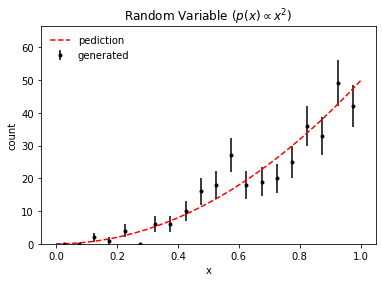

In [11]:
N = x.size
NBINS = 20   # number of histogram bins
# fill the histogram
hx,bins = np.histogram(x,bins=NBINS, range=(0,1))
# calculate the center of each bin:
cbins = (bins[1:] + bins[:-1])/2.0
# calculate the Poisson uncertainty for each bin:
hunc = np.sqrt(hx)
# plot the histogram including error bars:
plt.ylim(0,N/5)
plt.errorbar(cbins, hx, yerr=hunc, fmt="k.", label="generated")
# calculate and plot the prediction:
xp = np.linspace(0,1,100)
yp = 3*N*xp**2/NBINS
plt.plot(xp,yp,"r--", label="pediction")
# add legend, labels, and title
plt.legend(loc=2, frameon=False)
plt.xlabel("x")
plt.ylabel("count")
plt.title("Random Variable ($p(x) \propto x^2$)")
plt.savefig("quadhist.pdf")


In [12]:
SEED = 2021
a = 7**5
c = 0
M = 2**31-1
x = np.full(N, SEED)
for i in range(1,N):
    x[i]=(a*x[i-1]+c) % M
plt.plot(np.arange(500),x[1:501]/x[:500]/a,".")


ValueError: operands could not be broadcast together with shapes (331,) (332,) 

In [ ]:
from scipy import stats
def entropy(x,y,l,sbins):
    h,xbins,ybins=np.histogram2d(x,y,bins=sbins,range=[[-l,l],[-l,l]])
    return stats.entropy(h.flatten())

In [ ]:
# parameters
NPART   = 1000   # number of particles to simulate
MAXITER = 10000  # max iterations
STEP    = 0.05   # step size in random work
L       = 10     # box dimensions (-L,L) x (-L,L)
SBINS   = 20     # number of pins per dimension for entropy calculation
SPNTS   = 50     # number of points in the entropy plot

# benchmark points
BENCHMARK = np.array([10,100,1000,10000])
xb = []
yb = []
x = np.random.normal(size=NPART)*L/50.
y = np.random.normal(size=NPART)*L/50.
s = np.array([],dtype=float)
for i in range(MAXITER+1):
    x = x + np.random.choice([-1,1],size=NPART)*STEP
    y = y + np.random.choice([-1,1],size=NPART)*STEP    
    x = np.clip(x,-L,L)
    y = np.clip(y,-L,L)
    if (i in BENCHMARK):
        xb.append(x)
        yb.append(y)        
    if (i%(MAXITER/SPNTS)==0):
        s = np.append(s,entropy(x,y,L,SBINS))
        
plt.plot(np.linspace(0,MAXITER, SPNTS+1),s,"b-",ms=5)
plt.xlabel("Iterations")
plt.ylabel("Entropy")
plt.savefig("entropy.pdf")

In [ ]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
ax[1,1].set_xlim(-L,L)
ax[1,1].set_xlabel("x")
ax[1,0].set_xlim(-L,L)
ax[1,0].set_xlabel("x")
ax[0,0].set_ylim(-L,L)
ax[0,0].set_ylabel("y")
ax[1,0].set_ylim(-L,L)
ax[1,0].set_ylabel("y")

ax[0,0].text(9,7,"N="+str(BENCHMARK[0]), ha="right")
ax[0,0].plot(xb[0],yb[0], "b.", ms=2)
ax[0,1].text(9,7,"N="+str(BENCHMARK[1]), ha="right")
ax[0,1].plot(xb[1],yb[1], "b.", ms=2)
ax[1,0].text(9,7,"N="+str(BENCHMARK[2]), ha="right")
ax[1,0].plot(xb[2],yb[2], "b.", ms=2)
ax[1,1].text(9,7,"N="+str(BENCHMARK[3]), ha="right", backgroundcolor="white")
ax[1,1].plot(xb[3],yb[3], "b.", ms=2)

fig.savefig("diffusion.pdf")

In [ ]:
#3.1:  
def parkmiller(seed, n=10, norm=True):
    a = 7**5
    c = 0
    M = 2**31-1
    x = np.full(n, seed)
    for i in range(1,n):
        x[i]=(a*x[i-1]+c) % M
    if (norm):
        return x/M
    else:
        return x
print("seed=1: ", end="")
print(np.around(parkmiller(1)[1:11],3))
print("codecheck:  ", end="")
print(parkmiller(1,20000,False)[1],end="")
print(" (should be 1043618065)")
print("seed=2021:  ", end="")
print(np.around(parkmiller(2021)[1:11],3))
